In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install optuna
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBRFClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thesis project/BankChurners.csv')
#df

In [ ]:
df['Income_Category'].value_counts()

In [ ]:
columns_to_drop = ['Income_Category','Marital_Status', 'Education_Level', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
df_cleaned = df.drop(columns=columns_to_drop)
#df_cleaned.info()

In [ ]:
df_cleaned['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df_cleaned['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df_cleaned

In [ ]:
distinct_elements = df_cleaned['Card_Category'].unique()
print("Distinct elements in the column:", distinct_elements)

In [ ]:
df_cleaned['Card_Category'] = df['Card_Category'].map({'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3})
df_cleaned.dropna()

**VISUALISATION**

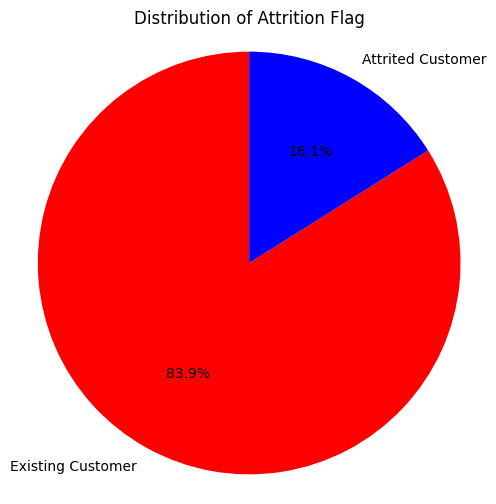

In [ ]:
# Explore Attrition_Flag value counts

attrition_counts = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Distribution of Attrition Flag')
plt.axis('equal')
plt.show()

In [ ]:
# Creating a dataframe  with the gender and attrition flag to find ratio and percentage of churn by M/F
Attrition_by_Gender = df.groupby(['Attrition_Flag', 'Gender']).size()

Attrition_by_Gender = Attrition_by_Gender.reset_index(name="Count")

Attrition_by_Gender['Percentage'] = Attrition_by_Gender['Count'] / Attrition_by_Gender['Count'].sum() * 100

total_counts = Attrition_by_Gender.groupby('Attrition_Flag')['Count'].transform('sum')
Attrition_by_Gender['Percentage_Gender'] = (Attrition_by_Gender['Count'] / total_counts) * 100
Attrition_by_Gender

,Attrition_Flag,Gender,Count,Percentage,Percentage_Gender
0,Attrited Customer,F,930,9.183371,57.160418
1,Attrited Customer,M,697,6.882591,42.839582
2,Existing Customer,F,4428,43.724696,52.094118
3,Existing Customer,M,4072,40.209341,47.905882


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
X = df_cleaned.drop(columns= ['Attrition_Flag', 'CLIENTNUM','Card_Category','Gender'], axis=1)
y = df_cleaned['Attrition_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9595261599210266


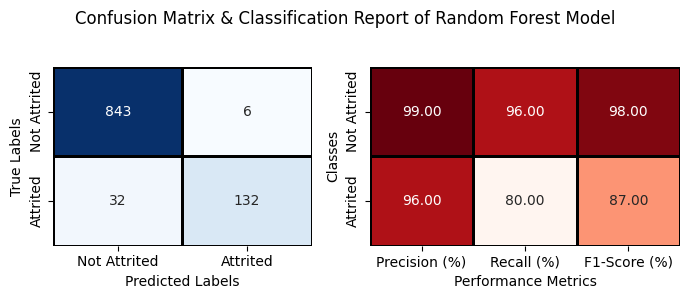

In [ ]:
# Define Confusion Matrix for Random Forest
conf_matrix_rf = np.array([[843, 6], [32, 132]])

# Define Classification Report for Random Forest
report_matrix_rf = np.array([[0.99, 0.96, 0.98], [0.96, 0.80, 0.87]]) * 100

fig, axes = plt.subplots(1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 1.2]})

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrited", "Attrited"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[0])

# Classification Report Heatmap
sns.heatmap(report_matrix_rf, annot=True, fmt=".2f", cmap="Reds", cbar=False,
            xticklabels=["Precision (%)", "Recall (%)", "F1-Score (%)"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[1])

fig.suptitle("Confusion Matrix & Classification Report of Random Forest Model", fontsize=12)

axes[0].set_ylabel("True Labels", fontsize=10)
axes[1].set_ylabel("Classes", fontsize=10)

axes[0].set_xlabel("Predicted Labels", fontsize=10)
axes[1].set_xlabel("Performance Metrics", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
precision_score(y_test, y_pred)

0.9337349397590361

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9387956564659428


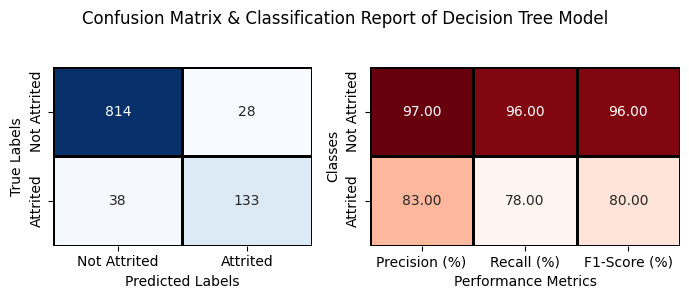

In [ ]:
# Define Confusion Matrix for Decision Tree
conf_matrix_dt = np.array([[814, 28], [38, 133]])

# Define Classification Report for Decision Tree
report_matrix_dt = np.array([[0.97, 0.96, 0.96], [0.83, 0.78, 0.80]]) * 100

fig, axes = plt.subplots(1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 1.2]})

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrited", "Attrited"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[0])

# Classification Report Heatmap
sns.heatmap(report_matrix_dt, annot=True, fmt=".2f", cmap="Reds", cbar=False,
            xticklabels=["Precision (%)", "Recall (%)", "F1-Score (%)"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[1])

fig.suptitle("Confusion Matrix & Classification Report of Decision Tree Model", fontsize=12)

axes[0].set_ylabel("True Labels", fontsize=10)
axes[1].set_ylabel("Classes", fontsize=10)

axes[0].set_xlabel("Predicted Labels", fontsize=10)
axes[1].set_xlabel("Performance Metrics", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# create a svm Classifier
svc = svm.SVC(kernel='linear') # linear kernel
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# train the model using train dataset
svc.fit(X_train, y_train)

# predict the churn for test dataset
y_pred = svc.predict(X_test)

svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Accuracy Test:", svc_acc)

Accuracy Train: 0.902786921220101
Accuracy Test: 0.8953603158933859


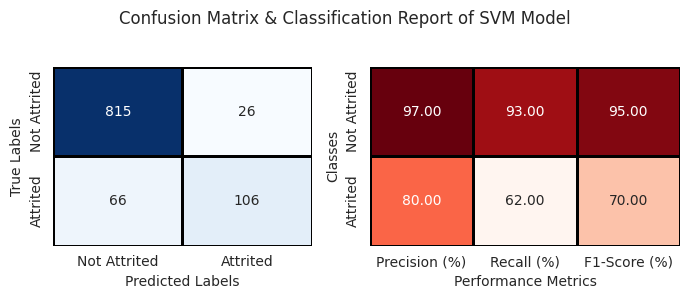

In [ ]:
# Define Confusion Matrix for SVM
conf_matrix_svm = np.array([[815, 26], [66, 106]])

# Define Classification Report for SVM
report_matrix_svm = np.array([[0.97, 0.93, 0.95], [0.80, 0.62, 0.70]]) * 100

fig, axes = plt.subplots(1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 1.2]})

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrited", "Attrited"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[0])

# Classification Report Heatmap
sns.heatmap(report_matrix_svm, annot=True, fmt=".2f", cmap="Reds", cbar=False,
            xticklabels=["Precision (%)", "Recall (%)", "F1-Score (%)"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[1])

fig.suptitle("Confusion Matrix & Classification Report of SVM Model", fontsize=12)

axes[0].set_ylabel("True Labels", fontsize=10)
axes[1].set_ylabel("Classes", fontsize=10)

axes[0].set_xlabel("Predicted Labels", fontsize=10)
axes[1].set_xlabel("Performance Metrics", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

ENSEMBLE XGB, RF

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBRFClassifier

In [ ]:
#X, y = make_classification()
model = XGBRFClassifier()
X = pd.DataFrame(X)
y = pd.Series(y)

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=10)

# Arrays to store metrics and trained models
models = []
accuracies = []
all_x = []
all_y =[]

# Perform cross-validation
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model on training data
    model.fit(X_train, y_train)
    models.append(model)  # Save the trained model

    # Evaluate on test data
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    all_x.append(X_test)
    all_y.append(y_test)
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv= cv , n_jobs=-1)
# Report metrics
print(f'Mean Accuracy: {np.mean(accuracies):.3f}, Std Dev: {np.std(accuracies):.3f}')

# Retrieve the best model based on performance
best_model_idx = np.argmax(accuracies)
best_model = models[best_model_idx]
X_test = all_x[best_model_idx]
y_test = all_y[best_model_idx]

print(np.max(accuracies))

Mean Accuracy: 0.950, Std Dev: 0.007
0.9693675889328063


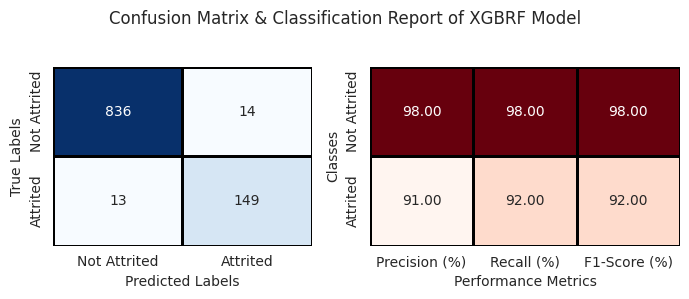

In [ ]:
# Define Confusion Matrix
conf_matrix = np.array([[836, 14], [13, 149]])

# Define Classification Report
report_matrix = np.array([[0.98, 0.98, 0.98], [0.91, 0.92, 0.92]]) * 100

fig, axes = plt.subplots(1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 1.2]})

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrited", "Attrited"], yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[0])

# Classification Report Heatmap
sns.heatmap(report_matrix, annot=True, fmt=".2f", cmap="Reds", cbar=False,
            xticklabels=["Precision (%)", "Recall (%)", "F1-Score (%)"],
            yticklabels=["Not Attrited", "Attrited"], linewidths=1, linecolor="black", ax=axes[1])

fig.suptitle("Confusion Matrix & Classification Report of XGBRF Model", fontsize=12)

axes[0].set_ylabel("True Labels", fontsize=10)
axes[1].set_ylabel("Classes", fontsize=10)

axes[0].set_xlabel("Predicted Labels", fontsize=10)
axes[1].set_xlabel("Performance Metrics", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plotting

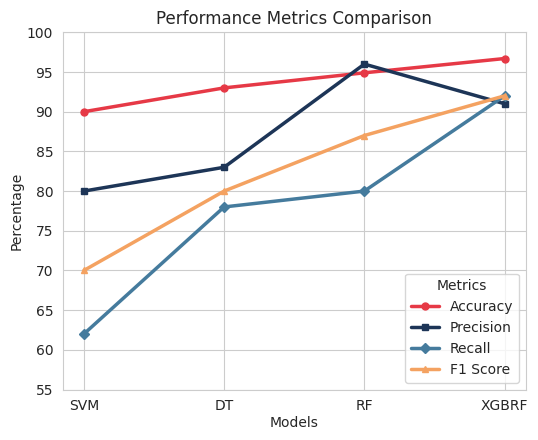

In [ ]:
# Data
models = ['SVM', 'DT', 'RF', 'XGBRF']
acc = [90, 93, 94.9, 96.7]
precision = [80, 83, 96, 91]
recall = [62, 78, 80, 92]
F1 = [70, 80, 87, 92]

colors = ['#E63946', '#1D3557', '#457B9D', '#F4A261']
markers = ['o', 's', 'D', '^']

# Plot
plt.figure(figsize=(5.5, 4.5))
plt.plot(models, acc, marker=markers[0], linestyle='-', linewidth=2.5, markersize=5, color=colors[0], label='Accuracy')
plt.plot(models, precision, marker=markers[1], linestyle='-', linewidth=2.5, markersize=5, color=colors[1], label='Precision')
plt.plot(models, recall, marker=markers[2], linestyle='-', linewidth=2.5, markersize=5, color=colors[2], label='Recall')
plt.plot(models, F1, marker=markers[3], linestyle='-', linewidth=2.5, markersize=5, color=colors[3], label='F1 Score')

plt.xlabel('Models', labelpad=2)
plt.ylabel('Percentage', labelpad=2)
plt.ylim(55, 100)
plt.title('Performance Metrics Comparison', pad=6)
plt.legend(title='Metrics', loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# Define corrected best parameters
best_params = study.best_params
# best_params = {'n_estimators': 849,
#  'max_depth': 3,
#  'subsample': 0.9985158565021617,
#  'colsample_bytree': 0.6529828936266978}


# Initialize model with best parameters
model = XGBRFClassifier(**best_params, random_state=42)

# Cross-validation setup (Reduced splits for better performance)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

# Arrays to store results
models = []
accuracies = []
all_x = []
all_y = []

# Perform cross-validation
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model on training data
    model.fit(X_train, y_train)
    models.append(model)  # Save the trained model

    # Evaluate on test data
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    all_x.append(X_test)
    all_y.append(y_test)

# Report metrics
print(f'Mean Accuracy: {np.mean(accuracies):.3f}, Std Dev: {np.std(accuracies):.3f}')

# Retrieve the best model based on performance
best_model_idx = np.argmax(accuracies)
best_model_tuned = models[best_model_idx]
X_test = all_x[best_model_idx]
y_test = all_y[best_model_idx]

print(f'Best Accuracy: {np.max(accuracies):.3f}')

Mean Accuracy: 0.964, Std Dev: 0.004
Best Accuracy: 0.971


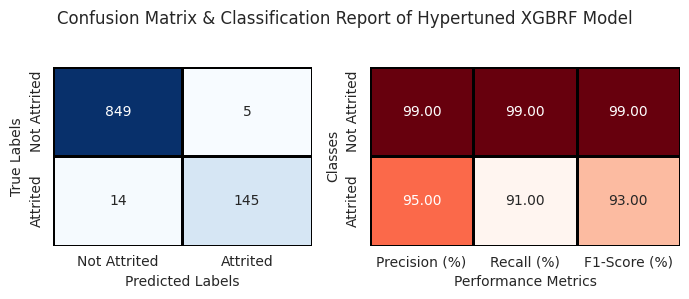

In [ ]:
# Define Confusion Matrix for Hypertuned XGBRF
conf_matrix_xgbrf = np.array([[849, 5], [14, 145]])

# Define Classification Report for Hypertuned XGBRF
report_matrix_xgbrf = np.array([[0.99, 0.99, 0.99], [0.95, 0.91, 0.93]]) * 100

fig, axes = plt.subplots(1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 1.2]})

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix_xgbrf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrited", "Attrited"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[0])

# Classification Report Heatmap
sns.heatmap(report_matrix_xgbrf, annot=True, fmt=".2f", cmap="Reds", cbar=False,
            xticklabels=["Precision (%)", "Recall (%)", "F1-Score (%)"],
            yticklabels=["Not Attrited", "Attrited"],
            linewidths=1, linecolor="black", ax=axes[1])

fig.suptitle("Confusion Matrix & Classification Report of Hypertuned XGBRF Model", fontsize=12)

axes[0].set_ylabel("True Labels", fontsize=10)
axes[1].set_ylabel("Classes", fontsize=10)

axes[0].set_xlabel("Predicted Labels", fontsize=10)
axes[1].set_xlabel("Performance Metrics", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Loaded_model = XGBRFClassifier()
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

final_voting_model = VotingClassifier(
    estimators=[('xgbrf', loaded_model)],
    voting='soft'  # Enables probability-based predictions
)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

if hasattr(final_voting_model, "predict_proba"):
    # Predict churn probabilities
    final_voting_model.fit(X_train, y_train)
    churn_probabilities = final_voting_model.predict_proba(X_test)[:, 1]
else:
    raise ValueError("The model does not support probability predictions.")

# Create DataFrame
customer_retention = pd.DataFrame({
    'Customer_ID': X_test.index,
    'Churn_Probability': churn_probabilities
})

# Define retention strategy based on churn probability
def assign_retention_strategy(prob):
    if prob > 0.80:
        return "Offer 30% discount + Priority Customer Support"
    elif prob > 0.60:
        return "Offer 15% discount + Exclusive Banking Services"
    elif prob > 0.40:
        return "Send Personalized Retention Email + Small Perks"
    else:
        return "Regular Engagement"

customer_retention['Retention_Action'] = customer_retention['Churn_Probability'].apply(assign_retention_strategy)

# Print first few rows
print(customer_retention)

      Customer_ID  Churn_Probability  \
0            8813           0.111408   
1            3103           0.072068   
2            4731           0.961210   
3            4177           0.964448   
4            4956           0.955460   
...           ...                ...   
1008          862           0.192524   
1009        10019           0.071640   
1010         6425           0.068649   
1011         8195           0.068649   
1012          728           0.934272   

                                    Retention_Action  
0                                 Regular Engagement  
1                                 Regular Engagement  
2     Offer 30% discount + Priority Customer Support  
3     Offer 30% discount + Priority Customer Support  
4     Offer 30% discount + Priority Customer Support  
...                                              ...  
1008                              Regular Engagement  
1009                              Regular Engagement  
1010                    

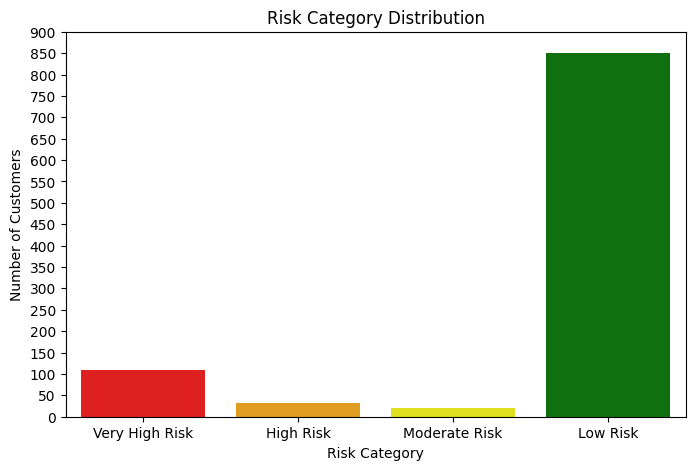

In [ ]:
# Predict churn probabilities using loaded_model
churn_probabilities = loaded_model.predict_proba(X_test)[:, 1]  # Get probability of churn

# Define risk categories based on probability thresholds
def assign_risk_category(prob):
    if prob > 0.80:
        return "Very High Risk"
    elif prob > 0.60:
        return "High Risk"
    elif prob > 0.40:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Create a DataFrame with churn probabilities and risk levels
customer_retention = pd.DataFrame({
    'Customer_ID': X_test.index,
    'Churn_Probability': churn_probabilities
})
customer_retention['Risk_Level'] = customer_retention['Churn_Probability'].apply(assign_risk_category)

# Count the number of customers in each risk category
risk_counts = customer_retention['Risk_Level'].value_counts().reindex(
    ["Very High Risk", "High Risk", "Moderate Risk", "Low Risk"], fill_value=0
)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values,
            palette={"Very High Risk": "red", "High Risk": "orange", "Moderate Risk": "yellow", "Low Risk": "green"})

plt.xlabel("Risk Category")
plt.ylabel("Number of Customers")
plt.title("Risk Category Distribution")

plt.yticks(range(0, max(risk_counts.values) + 50, 50))

plt.show()


In [ ]:
from tabulate import tabulate
# Define retention strategies based on risk categories
retention_strategies = {
    "Very High Risk": "🔴 Offer 30% Discount + Priority Support",
    "High Risk": "🟠 Offer 15% Discount + Exclusive Services",
    "Moderate Risk": "🟡 Personalized Email + Small Perks",
    "Low Risk": "🟢 Regular Engagement"
}
# Convert risk_counts into a DataFrame
retention_table = pd.DataFrame({
    "Risk Category": risk_counts.index,
    "Number of Customers": risk_counts.values,
    "Retention Strategy": [retention_strategies[risk] for risk in risk_counts.index]
})
print(tabulate(retention_table, headers="keys", tablefmt="grid"))

+----+-----------------+-----------------------+--------------------------------------------+
|    | Risk Category   |   Number of Customers | Retention Strategy                         |
+====+=================+=======================+============================================+
|  0 | Very High Risk  |                   109 | 🔴 Offer 30% Discount + Priority Support   |
+----+-----------------+-----------------------+--------------------------------------------+
|  1 | High Risk       |                    32 | 🟠 Offer 15% Discount + Exclusive Services |
+----+-----------------+-----------------------+--------------------------------------------+
|  2 | Moderate Risk   |                    21 | 🟡 Personalized Email + Small Perks        |
+----+-----------------+-----------------------+--------------------------------------------+
|  3 | Low Risk        |                   851 | 🟢 Regular Engagement                      |
+----+-----------------+-----------------------+----------------

In [ ]:
# Predict churn probabilities using the loaded model
churn_probabilities = loaded_model.predict_proba(X_test)[:, 1]  # Get probability of churn

# Define risk categories based on probability thresholds
def assign_risk_category(prob):
    if prob > 0.80:
        return "🔴 Very High Risk"
    elif prob > 0.60:
        return "🟠 High Risk"
    elif prob > 0.40:
        return "🟡 Medium Risk"
    else:
        return "🟢 Low Risk"

# Create a DataFrame to store CLIENTNUM, churn probability, and risk level
customer_risk_data = pd.DataFrame({
    'CLIENTNUM': X_test.index,  # Assuming CLIENTNUM is the index of X_test
    'Churn_Probability': churn_probabilities
})
customer_risk_data['Risk_Level'] = customer_risk_data['Churn_Probability'].apply(assign_risk_category)

# Function to check an individual client’s risk
def check_client_risk(CLIENTNUM):
    client_info = customer_risk_data.loc[customer_risk_data['CLIENTNUM'] == CLIENTNUM]

    if not client_info.empty:
        print(client_info[['CLIENTNUM', 'Churn_Probability', 'Risk_Level']])
    else:
        print(f"CLIENTNUM {CLIENTNUM} not found.")

check_client_risk(3103)

   CLIENTNUM  Churn_Probability  Risk_Level
1       3103           0.089618  🟢 Low Risk
